$$\textrm{Joaquin Peñuela Parra}$$
$$\textrm{Universidad de los Andes}$$
$$\textrm{Grupo de Física de Altas Energías: Fenomenología de Partículas}$$

$\textbf{Preliminares}$ 

Las librerías que se usan aquí son las siguientes: 

In [1]:
import os, sys

Path_delphes_preselection = os.path.dirname(os.path.realpath('Histos_JP.ipynb'))
Path_Leptoquarks_searches = os.path.dirname(Path_delphes_preselection)
Path_Pheno_BSM = os.path.dirname(Path_Leptoquarks_searches)

sys.path.append(Path_Pheno_BSM) #Permite importar delphes_reader

import uproot # Permite leer y guardar histogramas en archivos .root

from ROOT import TH1F #Permite graficar los histogramas usando ROOT
from ROOT import TCanvas #Permite poner los histogramas
from ROOT import THStack #Permite graficar varios histogramas al mismo tiempo
from ROOT import TLegend #Permite poner legends cuando se sobrelapan histogramas
from ROOT import TLatex #Permite poner avisos en Latex en las graficas

from delphes_reader import DelphesLoader 
from delphes_reader import root_analysis
from delphes_reader import Quiet

import pandas as pd
import numpy as np

#from IPython.display import clear_output #Permite limpiar la línea del output para que no se imprima nada (es algo estético que se usa a veces) 
#import nbimporter #Permite importar otros notebooks y usar sus funciones
import time
from tqdm.auto import tqdm

events_sub_folder = f'{Path_delphes_preselection}/Selected_Events' #Carpeta donde están los csv preseleccionados

Welcome to JupyROOT 6.26/06


In [2]:
# def guardar_uproot(nombre_archivo, ruta, histograma, actualizar = False):
#     #Esta función permite guardar un histograma ya sea creado por ROOT o por Numpy, en un archivo.root
    
#     #nombre_archivo: nombre del archivo.root
#     #ruta: ruta que tendrá el histograma dentro del archivo.root, si se quieren tener subdirectorios se usa "/"
#     #histograma: histograma que se va a guardar en el archivo.root
#     #actualizar: Boolean que permite saber si se necesita actualizar el archivo.root o en su defecto crearlo desde 0
    
#     if actualizar: file = uproot.update(nombre_archivo) #Así no se borra todo lo que ya está en el .root
#     else: file = uproot.recreate(nombre_archivo, compression = uproot.ZLIB(4)) 
    
#     file[ruta] = histograma
#     file.close() 

# def guardar_directorio_uproot(nombre_archivo, ruta, Histo_Dict, Actualizar):
#     #Esta función permite guardar un diccionario de histog4ramas ya sea creado por ROOT o por Numpy, en un archivo.root
    
#     #nombre_archivo: nombre del archivo.root
#     #ruta: ruta que tendrá el histograma dentro del archivo.root, si se quieren tener subdirectorios se usa "/"
#     #Histo_Dict: Directorio de histogramas que se van a guardar en el archivo.root
    
#     for v_cinematic in Histo_Dict:
#         histo = Histo_Dict[v_cinematic]
#         guardar_uproot(nombre_archivo, f'{ruta}/{v_cinematic}', histo, actualizar = Actualizar) 

Primero debemos anotar las etiquetas con que están nombrados los archivos, así puso los nombres Cristian:

In [3]:
channels = ['hadronic', 'semileptonic']
processes = ['b_b_tau_tau', 'b_tau_tau']
signals = ['LQ_LQ','Tau_LQ']
Masses = ['0250','0500','0750','1000', '1250', '1500', '1750', '2000', '2250', '2500']
bkgs = ['stop','ttbar', 'w_jets', 'ww', 'wz', 'z_jets', 'zz']

betards ={'Betard_minus1': '', 'Betard_0' :'wo_RHC_'}

Para saber leer los archivos es importante primero poder nombrarlos, así que primero intentemos imprimir los nombres de los archivos solamente:

In [4]:
# for signal in signals:
#     for M in Masses:
#         for process in processes:
#             for channel in channels:
#                 print(f'{signal}_{M}_{process}_{channel}.csv')
                
# for bkg in bkgs:
#         for process in processes:
#             for channel in channels:
#                 print(f'{bkg}_{process}_{channel}.csv') 

Ahora leamos cada Dataset y guardemoslo en un directorio siguiendo una estructuar similar a como los leímos.

In [5]:
Datasets_signal = {} #Directorio en donde guardaremos los datasets de señal
betard_bar = tqdm(list(betards.keys()))

for betard in betard_bar:
    Datasets_signal[betard] = {}
    betard_bar.set_description("Procesando señal con %s" % betard)

    for signal in signals:
        Datasets_signal[betard][signal] = {}

        for M in Masses:
            Datasets_signal[betard][signal][M] = {}

            for process in processes:
                Datasets_signal[betard][signal][M][process] = {}

                for channel in channels:
                    path_csv = f'{events_sub_folder}/{signal}_{M}_{betards[betard]}{process}_{channel}.csv'
                    try: Datasets_signal[betard][signal][M][process][channel] = pd.read_csv(path_csv)
                    except: 
                        Datasets_signal[betard][signal][M][process][channel] = {}
                        print(f'El archivo {signal}_{M}_{betards[betard]}{process}_{channel}.csv está vacío')
                
Datasets_bkg = {} #Directorio en donde guardaremos los datasets de background
bkg_bar = tqdm(bkgs)

for bkg in bkg_bar:
    bkg_bar.set_description("Procesando background %s" % bkg)
    
    Datasets_bkg[bkg] = {}

    for process in processes:
        Datasets_bkg[bkg][process] = {}

        for channel in channels:
            path_csv = f'{events_sub_folder}/{bkg}_{process}_{channel}.csv'
            
            try: Datasets_bkg[bkg][process][channel] = pd.read_csv(path_csv)
            except: 
                Datasets_bkg[bkg][process][channel] = {}
                print(f'El archivo {bkg}_{process}_{channel}.csv está vacío')
            
print('Todos los archivos .csv han sido leídos')

  0%|          | 0/2 [00:00<?, ?it/s]

El archivo LQ_LQ_0250_wo_RHC_b_b_tau_tau_hadronic.csv está vacío
El archivo LQ_LQ_0250_wo_RHC_b_b_tau_tau_semileptonic.csv está vacío
El archivo LQ_LQ_0250_wo_RHC_b_tau_tau_hadronic.csv está vacío
El archivo LQ_LQ_0250_wo_RHC_b_tau_tau_semileptonic.csv está vacío
El archivo LQ_LQ_0500_wo_RHC_b_b_tau_tau_hadronic.csv está vacío
El archivo LQ_LQ_0500_wo_RHC_b_b_tau_tau_semileptonic.csv está vacío
El archivo LQ_LQ_0500_wo_RHC_b_tau_tau_hadronic.csv está vacío
El archivo LQ_LQ_0500_wo_RHC_b_tau_tau_semileptonic.csv está vacío
El archivo LQ_LQ_0750_wo_RHC_b_b_tau_tau_hadronic.csv está vacío
El archivo LQ_LQ_0750_wo_RHC_b_b_tau_tau_semileptonic.csv está vacío
El archivo LQ_LQ_0750_wo_RHC_b_tau_tau_hadronic.csv está vacío
El archivo LQ_LQ_0750_wo_RHC_b_tau_tau_semileptonic.csv está vacío
El archivo Tau_LQ_0250_wo_RHC_b_b_tau_tau_hadronic.csv está vacío
El archivo Tau_LQ_0250_wo_RHC_b_b_tau_tau_semileptonic.csv está vacío
El archivo Tau_LQ_0250_wo_RHC_b_tau_tau_hadronic.csv está vacío
El archi

  0%|          | 0/7 [00:00<?, ?it/s]

Todos los archivos .csv han sido leídos


Así, si queremos acceder a alguno de los datasets simplemente hay que usar las keys definidas en signals, bkgs, Masses, processes y channels:

In [6]:
Datasets_signal.keys()

dict_keys(['Betard_minus1', 'Betard_0'])

In [7]:
Datasets_signal['Betard_0']['LQ_LQ']['1000']['b_b_tau_tau']['hadronic']

,MET(GeV),#phi_{MET},light_jets_multiplicity,pT_{b_{1}}(GeV),#eta_{b_{1}},#phi_{b_{1}},Energy_{b_{1}}(GeV),Mass_{b_{1}}(GeV),#Delta R_{b_{1}b_{2}},#Delta #eta_{b_{1}b_{2}},...,#Delta pT_{#tau_{1}#tau_{2}}(GeV),#Delta #vec{pT}_{#tau_{1}#tau_{2}}(GeV),#Delta #vec{p}_{#tau_{1}#tau_{2}}(GeV),pT_{#tau_{2}}(GeV),#eta_{#tau_{2}},#phi_{#tau_{2}},Energy_{#tau_{2}}(GeV),Mass_{#tau_{2}}(GeV),Q_{#tau_{1}}Q_{#tau_{2}},sT(GeV)
0,64.996651,1.011624,1,1079.631714,1.065457,-2.613858,1752.869403,28.428236,2.794554,1.089316,...,47.411652,312.692748,320.677573,244.780212,0.998546,0.115780,377.544385,13.648501,-1.0,2757.976662
1,215.516144,0.460731,4,665.286926,-0.434211,2.774163,731.959903,65.817085,3.439033,1.608517,...,293.782967,347.368446,348.469933,42.315147,-0.915008,-3.138366,61.714054,7.136831,-1.0,1317.364571
2,401.374054,1.587021,2,1029.350464,-0.096514,-0.358493,1035.365560,50.190540,1.937363,-1.503760,...,218.573318,264.351637,335.135487,91.668991,0.441675,1.275223,100.758646,0.650835,-1.0,2316.784836
3,52.769936,1.438718,3,832.296753,-0.842164,-3.026839,1150.509069,109.275856,0.581356,-0.203510,...,680.860321,982.574277,2066.186278,166.130341,-0.152018,-2.473319,168.450826,11.560968,-1.0,1963.183029
4,114.164551,0.189439,2,271.042542,-0.503024,-1.445118,307.319764,27.763838,3.067227,-0.717149,...,296.915100,931.597944,1649.198460,317.553345,-0.165657,0.598858,323.416329,31.069275,-1.0,1544.646805
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18878,201.812836,2.079109,2,513.597900,0.598151,-2.297364,609.918515,45.096581,3.645669,1.927216,...,112.745255,377.399038,380.794735,132.691284,-0.138756,-1.460117,133.998673,2.737386,-1.0,1264.402527
18879,125.431046,2.370930,2,400.922913,-1.181120,-1.370604,714.981052,22.196676,3.035089,-0.024141,...,174.631294,180.157952,208.256785,26.138527,-1.616661,0.343423,68.418335,0.665773,-1.0,958.581459
18880,677.244080,-0.381105,2,1615.639282,-0.195344,3.007174,1647.485302,55.109970,2.084937,1.023768,...,862.813267,889.624615,1240.208088,58.158108,2.127007,-1.377700,247.521231,6.680480,-1.0,3589.430447
18881,339.218079,1.927794,1,783.068115,-1.666599,-1.670589,2147.575668,58.141197,3.477464,-2.229960,...,123.144741,176.871109,276.830498,31.599461,-1.324698,-1.163217,63.678543,2.624224,-1.0,1887.152744


In [8]:
Datasets_bkg['ttbar']['b_b_tau_tau']['hadronic']

,MET(GeV),#phi_{MET},light_jets_multiplicity,pT_{b_{1}}(GeV),#eta_{b_{1}},#phi_{b_{1}},Energy_{b_{1}}(GeV),Mass_{b_{1}}(GeV),#Delta R_{b_{1}b_{2}},#Delta #eta_{b_{1}b_{2}},...,#Delta pT_{#tau_{1}#tau_{2}}(GeV),#Delta #vec{pT}_{#tau_{1}#tau_{2}}(GeV),#Delta #vec{p}_{#tau_{1}#tau_{2}}(GeV),pT_{#tau_{2}}(GeV),#eta_{#tau_{2}},#phi_{#tau_{2}},Energy_{#tau_{2}}(GeV),Mass_{#tau_{2}}(GeV),Q_{#tau_{1}}Q_{#tau_{2}},sT(GeV)
0,33.984440,0.941323,2,112.528587,1.468664,-1.657221,257.667293,13.104623,2.540995,2.143082,...,25.897896,82.561591,209.827028,49.618881,-0.263046,1.147104,51.899486,7.563221,1,334.602268
1,31.110018,-1.825848,2,128.732376,-1.442342,0.067906,287.891451,14.588214,3.702700,-2.117748,...,0.651941,47.375041,50.716000,26.095125,-2.166670,0.316069,115.507123,5.220170,-1,314.428017
2,43.272568,-2.297757,0,89.665390,-0.623221,0.340220,108.082460,9.663942,1.015906,-0.778276,...,76.197453,150.795550,300.408059,39.052586,-2.264220,0.832332,190.073180,7.048686,-1,322.881092
3,22.354801,-2.831679,2,110.468552,-0.574573,-1.201963,130.170135,15.776822,2.130969,1.017704,...,7.226418,131.790470,134.013695,105.377502,-0.213037,0.554533,109.555247,19.654304,1,439.317967
4,40.557877,-0.559836,0,411.701965,-1.597919,2.144173,1062.911308,89.763916,3.941149,-2.399010,...,0.203081,63.166428,63.181724,31.837103,1.879374,0.483858,107.010903,8.313030,-1,687.866117
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14813,35.227753,-1.056337,1,144.578812,-0.659600,3.030582,180.015279,31.785450,1.948579,1.114017,...,78.575371,125.638962,159.905514,32.716995,-1.261776,0.019821,62.593219,4.850304,1,354.010673
14814,152.095612,0.106248,1,134.150757,-0.254446,-1.372161,139.856956,19.314384,3.384293,-1.674590,...,17.239124,58.159909,76.889592,53.742565,1.980348,-2.948638,198.891660,13.998737,-1,511.974522
14815,87.801346,0.021366,2,135.161118,0.152867,-0.483238,137.574465,15.098509,1.796240,0.834760,...,26.500019,42.435412,88.011577,28.068546,-0.228920,1.563313,28.825290,1.020513,-1,384.044399
14816,61.629715,1.382785,2,127.978798,-1.049765,-2.115394,205.477794,10.408239,2.687262,0.969881,...,0.190050,51.755583,94.209463,29.794008,-1.032204,-2.912493,47.173200,2.105677,-1,280.234182


In [9]:
Datasets_signal['Betard_minus1']['LQ_LQ']['0500']['b_b_tau_tau']['hadronic']['sT(GeV)']

0         631.399258
1        1106.242981
2        1025.330307
3        1044.941116
4         703.065651
            ...     
21325     970.677330
21326     758.518562
21327     715.339474
21328     751.228458
21329     826.171089
Name: sT(GeV), Length: 21330, dtype: float64

Creemos todos los histogramas usando la función root_analysis .make_histograms y guardemoslos en diccionarios siguiendo la misma estructura con la que leímos los .csv

In [10]:
#Para usar root_analysis 
histogramas_bins_dict={
    "#Delta R":[96,0,7],
    "#Delta #eta":[80,-5,5],
    "#Delta #phi":[52,-3.25,3.25],
    "#Delta pT":[120, 0.0, 1500.0],
    "#Delta #vec{pT}":[240, 0.0, 4800.0],
    "#Delta #vec{p}":[240, 0.0, 4800.0],
    "MET(GeV)":[80, 0.0, 1000.0],
    "pT_": [160, 0.0, 2000.0],
    "sT(GeV)": [50, 0.0, 5000.0],
    "mT(GeV)": [200, 0.0, 4000.0],
    "#eta_":[80, -5, 5],
    "#phi_":[128, -3.2, 3.2],
    "Energy_":[80, 0.0, 1000.0]
}

In [11]:
Histogramas_signal = {} #Directorio en donde guardaremos los datasets de señal

betard_bar = tqdm(list(betards.keys()))

for betard in betard_bar:
    
    betard_bar.set_description("Creando histogramas para %s" % betard)
    Histogramas_signal[betard] = {}

    for signal in signals:

        Histogramas_signal[betard][signal] = {}

        for M in Masses:
            Histogramas_signal[betard][signal][M] = {}

            for process in processes:
                Histogramas_signal[betard][signal][M][process] = {}

                for channel in channels:
                    Data = Datasets_signal[betard][signal][M][process][channel]
                    try: Histogramas_signal[betard][signal][M][process][channel] = root_analysis.make_histograms(Data, hist_bins_dict = histogramas_bins_dict)
                    except: Histogramas_signal[betard][signal][M][process][channel] = {}
                
Histogramas_bkg = {} #Directorio en donde guardaremos los datasets de background
bkg_bar = tqdm(bkgs)

for bkg in bkg_bar:
    bkg_bar.set_description("Creando histogramas del background %s" % bkg)
    
    Histogramas_bkg[bkg] = {}

    for process in processes:
        Histogramas_bkg[bkg][process] = {}

        for channel in channels:
                Data = Datasets_bkg[bkg][process][channel]
                try: Histogramas_bkg[bkg][process][channel] = root_analysis.make_histograms(Data, hist_bins_dict = histogramas_bins_dict)                
                except: Histogramas_bkg[bkg][process][channel] = {}

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

In [12]:
# Histogramas_signal

Ahora gBetard_minus1/demoslos en .png y un archivo.root

In [13]:
# with Quiet():
#     histos_sub_folder ='Histos_CSV'
#     !mkdir -p {histos_sub_folder}

#     file = uproot.recreate(f'{histos_sub_folder}/Histos_CSV.root')

#     betard_bar = tqdm(betards)
#     for betard in betard_bar:
#         betard_bar.set_description("Guardando histogramas de la señal con %s" % betard)
#         for signal in signals:
#             for M in Masses:
#                 for process in processes:
#                     for channel in channels:
#                         Histo_Dict= Histogramas_signal[betard][signal][M][process][channel]
#                         for v_cinematic in Histo_Dict:
#                             histo = Histo_Dict[v_cinematic]
#                             #Guardar en el .root
#                             file[f'{betard}/{channel}/{process}/{signal}/{M}/{v_cinematic}'] = histo
#                             #Guardar el .png con la misma estructura del .root
#                             !mkdir -p {histos_sub_folder}/{betard}/{channel}/{process}/{signal}/{M}
#                             canvas = TCanvas(f'{betard}/{channel}/{process}/{signal}/{M}/{v_cinematic}', " ", 600, 400)
#                             histo.Draw('hist')
#                             canvas.Draw()
#                             canvas.Print(f'{histos_sub_folder}/{betard}/{channel}/{process}/{signal}/{M}/{v_cinematic}.png')

In [14]:
    # bkg_bar = tqdm(bkgs)                    
    # for bkg in bkg_bar:
    #     bkg_bar.set_description("Guardando histogramas del background %s" % bkg)
    #     for process in processes:
    #         for channel in channels:
    #             Histo_Dict= Histogramas_bkg[bkg][process][channel]
    #             for v_cinematic in Histo_Dict:
    #                 histo = Histo_Dict[v_cinematic]
    #                 #Guardar en el .root
    #                 file[f'BKG/{channel}/{process}/{bkg}/{v_cinematic}'] = histo 
    #                 #Guardar el .png con la misma estructura del .root
    #                 !mkdir -p {histos_sub_folder}/BKG/{channel}/{process}/{bkg}
    #                 canvas = TCanvas(f'{channel}/{process}/{bkg}/{v_cinematic}', " ", 600, 400)
    #                 histo.Draw('hist')
    #                 canvas.Draw()
    #                 canvas.Print(f'{histos_sub_folder}/BKG/{channel}/{process}/{bkg}/{v_cinematic}.png')                    
    # file.close()
    # print(f'Se han guardado todos los histogramas en el archivo {histos_sub_folder}/Histos_CSV.root')

Recordemos que root_analysis.make_histograms los genera de una vez normalizados a la unidad, por lo que ahora podemos graficarlos de una vez:

In [15]:
canvas = TCanvas("Canvas", " ", 600, 400)

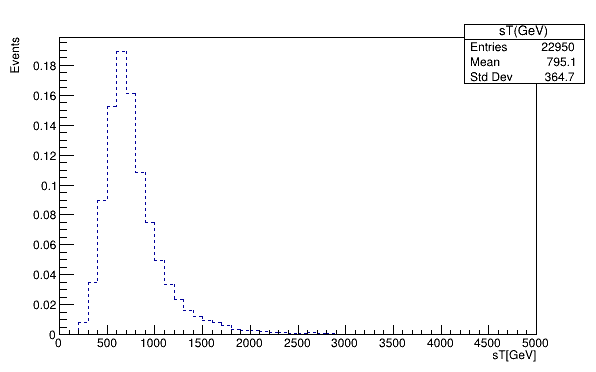

In [16]:
Histogramas_signal['Betard_minus1']['LQ_LQ']['0500']['b_tau_tau']['hadronic']['sT(GeV)'].SetLineStyle(2)
Histogramas_signal['Betard_minus1']['LQ_LQ']['0500']['b_tau_tau']['hadronic']['sT(GeV)'].Draw('hist')
canvas.Draw()

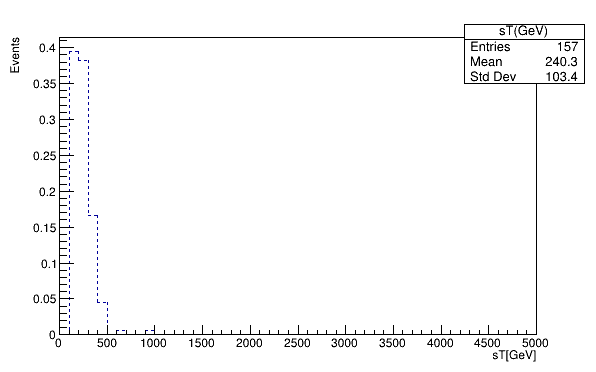

In [17]:
Histogramas_bkg['w_jets']['b_tau_tau']['semileptonic']['sT(GeV)'].SetLineStyle(2)
Histogramas_bkg['w_jets']['b_tau_tau']['semileptonic']['sT(GeV)'].Draw('hist')
canvas.Draw()

Ahora hagamos un overlap de los histogramas, para esto me basaré en una función que está en los tutoriales, la función Overlap_Histos y le cambiaré algunas cosas para que funcione con esta estructura de directorios que estamos usando. Sin embargo antes de hacerlo, es necesario definir una función que extraíga el número de eventos de los archivos Cutflow que Cristian creo. Así si se desea se podrá normalizar según el número de eventos.

In [18]:
def N_events(process, channel, signal):
    
    path_csv = f'{events_sub_folder}/Cutflow_{process}_{channel}.csv'
    cutflow = pd.read_csv(path_csv)
    
    return cutflow[signal][cutflow.shape[0]-1]

Veamos que efectivamente funciona:

In [19]:
pd.read_csv(f'{events_sub_folder}/Cutflow_b_b_tau_tau_hadronic.csv')

,Unnamed: 0,cut,w_jets,z_jets,ww,wz,zz,Tau_LQ_0250,LQ_LQ_0250,Tau_LQ_0500,...,Tau_LQ_1500_wo_RHC,LQ_LQ_1500_wo_RHC,Tau_LQ_1750_wo_RHC,LQ_LQ_1750_wo_RHC,Tau_LQ_2000_wo_RHC,LQ_LQ_2000_wo_RHC,Tau_LQ_2250_wo_RHC,LQ_LQ_2250_wo_RHC,Tau_LQ_2500_wo_RHC,LQ_LQ_2500_wo_RHC
0,0,xs,1.465483e+05,4.302927e+04,65.507360,24.691840,9.562416,182.300000,9.379000e+02,5.944000,...,0.003047,0.006548,0.000917,0.001423,0.000301,0.000331,0.000106,0.000080,0.000039,0.000020
1,1,All_events,1.000000e+00,1.000000e+00,1.000000,1.000000,1.000000,1.000000,1.000000e+00,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2,2,At least two good hadronic taus,1.225718e-04,1.235790e-03,0.001015,0.002241,0.003630,0.110575,9.839667e-02,0.107638,...,0.087940,0.053939,0.087771,0.053373,0.087844,0.052882,0.086703,0.051619,0.086788,0.051245
3,3,At least two b jet,3.819924e-07,7.565289e-07,0.000002,0.000010,0.000075,0.014108,3.511833e-02,0.016835,...,0.014990,0.022995,0.014682,0.022582,0.014481,0.022193,0.014653,0.021811,0.014254,0.021485
4,4,nEvents (137/fb),7.669307e+03,4.459745e+03,15.077174,32.625817,97.860809,352357.035833,4.512435e+06,13709.211880,...,6.257903,20.628981,1.843602,4.400938,0.597580,1.005400,0.212201,0.238687,0.076078,0.058514


In [20]:
N_events('b_b_tau_tau', 'hadronic', 'w_jets'), N_events('b_b_tau_tau', 'hadronic', 'Tau_LQ_1000_wo_RHC')

(7669.306893344798, 102.78399488031248)

Por otro lado, antes de hacer el overlap implementemos una función que permita sumar histogramas

In [21]:
def sum_histos(histo_list):
    result = TH1F('sum', 'sum', histo_list[0].GetNbinsX(),0.0,histo_list[0].GetBinWidth(0)*histo_list[0].GetNbinsX())
    result.SetDirectory(0)
    
    for histo in histo_list:
        for i in range(histo.GetNbinsX()):
            #Sumemos los bines
            sum_ = result.GetBinContent(i + 1)
            sum_ = sum_ + histo.GetBinContent(i + 1)
            result.SetBinContent(i+1, sum_)
            #Sumemos el error
            err_ = result.GetBinError(i + 1)
            err_ = err_ + histo.GetBinError(i+1)
            result.SetBinError(i+1, err_)
        
    return result

Probemosla

In [22]:
# Etiqueta = 'Diboson'
# h1 = Histogramas_bkg['ww']['b_tau_tau']['hadronic']['sT(GeV)']
# h1.Scale(N_events('b_tau_tau','hadronic', 'ww')/h1.Integral())

# h2 = Histogramas_bkg['wz']['b_tau_tau']['hadronic']['sT(GeV)']
# h2.Scale(N_events('b_tau_tau','hadronic', 'wz')/h2.Integral())

# h3 = Histogramas_bkg['zz']['b_tau_tau']['hadronic']['sT(GeV)']
# h3.Scale(N_events('b_tau_tau','hadronic', 'zz')/h3.Integral())

# lista = [h1,h2,h3]
# suma = sum_histos(lista)

# Combinaciones = {'Diboson': ['ww', 'wz', 'zz'], 'V_jets': ['w_jets', 'z_jets']}

# process = 'b_tau_tau'
# channel = 'hadronic'
# Variable_cinematica = 'sT(GeV)'

# for combinacion in Combinaciones:
#         signal_list = Combinaciones[combinacion]
#         histo_list = []
#         for signal in signal_list:
#             h = Histogramas_bkg[signal][process][channel][Variable_cinematica]
#             h.Scale(N_events(process, channel, signal)/h.Integral())
#             histo_list.append(h)
#         histo_suma = sum_histos(histo_list)
#         histo_suma.Draw('hist')
#         canvas.Draw()

Con esto ahora si hagamos el Overlap de los histogramas:

In [23]:
def Overlap_Histos(histogramas_signal, histogramas_bkg, process, channel, cinematic_variable, 
                   signals, bkgs, Titulo, M, ignorar = '', alpha_bkg = 0.05, alpha_signal = 0.05, betard_label = '',
                   Stack = False, Log_Y = False, Log_X = True, Grid = False):
    
    #Si Stack es False -> Se normaliza por unidad de area
    #Si Stack es True -> Se normaliza según el número de eventos
    
    canvas = TCanvas(Titulo, " ", 800, 600)
    
    #legend = TLegend(0.9,.4,1,.89) #Afuera de la grafica
    legend = TLegend(0.5,.75,0.89,.89)
    legend.SetNColumns(4) 
    
    letreto_beta = ', #beta_{R}^{b #tau} = -1' 
    if betard_label != '': letreto_beta = ', #beta_{R}^{b #tau} = 0' 
    
    legend.SetHeader('M_{U}' + f'= {int(M)/1000} TeV' + ', g_{U} = 1.8' + letreto_beta  ,"C")
    legend.SetLineWidth(1)
    
    #legend.SetFillStyle(0) #Así la ventana con los legends es transparente

    Histos = THStack('hist', Titulo)
        
    for i in range(len(bkgs.keys())):
            combinacion_bkg = list(bkgs.keys())[i]
            bkg_list = bkgs[combinacion_bkg]
            
            histo_list = []
            for bkg in bkg_list:
                if (bkg != ignorar):
                    if (histogramas_bkg[bkg][process][channel][cinematic_variable] != {}):
                        h = histogramas_bkg[bkg][process][channel][cinematic_variable]
                        h.Scale(N_events(process, channel, bkg)/h.Integral())
                        histo_list.append(h)
                
            histo_Nevents = sum_histos(histo_list)
            
            histo_normalizado = sum_histos(histo_list)
            histo_normalizado.Scale(1.0/histo_normalizado.Integral())
            
            if (Stack): histo = histo_Nevents
            else: histo = histo_normalizado
            
            color = len(signals.keys()) + i + 1
            if color == 7: color = 3
            if color == 5: color = 800 -3
                
            histo.SetLineColor(color)
            histo.SetFillColorAlpha(color, alpha_bkg)
            histo.SetLineWidth(2)
            histo.SetDirectory(0)     
            
            Histos.Add(histo)
            legend.AddEntry(histo,combinacion_bkg)
            
    for j in range(len(signals.keys())):
            combinacion_signal = list(signals.keys())[j]
            signal_list = signals[combinacion_signal]
            
            histo_list = []
            for signal in signal_list:
                if (signal != ignorar):
                    if (histogramas_signal[signal][M][process][channel][cinematic_variable] != {}):
                        h = histogramas_signal[signal][M][process][channel][cinematic_variable]
                        h.Scale(N_events(process, channel, f'{signal}_{M}{betard_label}')/h.Integral())
                        histo_list.append(h)
                
            histo_Nevents = sum_histos(histo_list)
            
            histo_normalizado = sum_histos(histo_list)
            histo_normalizado.Scale(1.0/histo_normalizado.Integral())
            
            if (Stack): histo = histo_Nevents
            else: histo = histo_normalizado
            
            color = j + 1
            if color == 3: color = 7
            if color == 5: color = 800 -3 
            
            histo.SetLineColor(color)
            histo.SetFillColorAlpha(color, alpha_signal)
            histo.SetLineStyle(2)
            histo.SetLineWidth(2)
            histo.SetDirectory(0)     
            
            Histos.Add(histo)
            legend.AddEntry(histo,combinacion_signal)
            
    if Log_Y: canvas.SetLogy()
    if Log_X: canvas.SetLogx()
    if Grid: canvas.SetGrid()
    
    if Stack:
        Histos.Draw("hist")
        eje_x = cinematic_variable.replace('sT(GeV)', 'S_{T}^{MET} (GeV)').replace('(' , "[" ).replace(')' , "]" )
        Histos.SetTitle(f'{Titulo}; {eje_x}; Events')  
        
    else: 
        Histos.Draw("histnostack")
        eje_x = cinematic_variable.replace('sT(GeV)', 'S_{T}^{MET} (GeV)').replace('(' , "[" ).replace(')' , "]" )
        Histos.SetTitle(f'{Titulo}; {eje_x}; A.U')  
    
    latex = TLatex()
    latex.SetNDC()
    latex.SetTextSize(0.04)
    latex.DrawLatex(0.76,0.91,'#sqrt{s} = 13 TeV')
    #latex.DrawLatex(0.61,0.91,'#sqrt{s} = 13 TeV, L = 137 fb^{-1}')

    
    canvas.Draw()
    legend.Draw('same')
    
    #Histos.GetXaxis().SetLimits(0.0, float(M)*3)  
    
    return Histos, canvas, legend

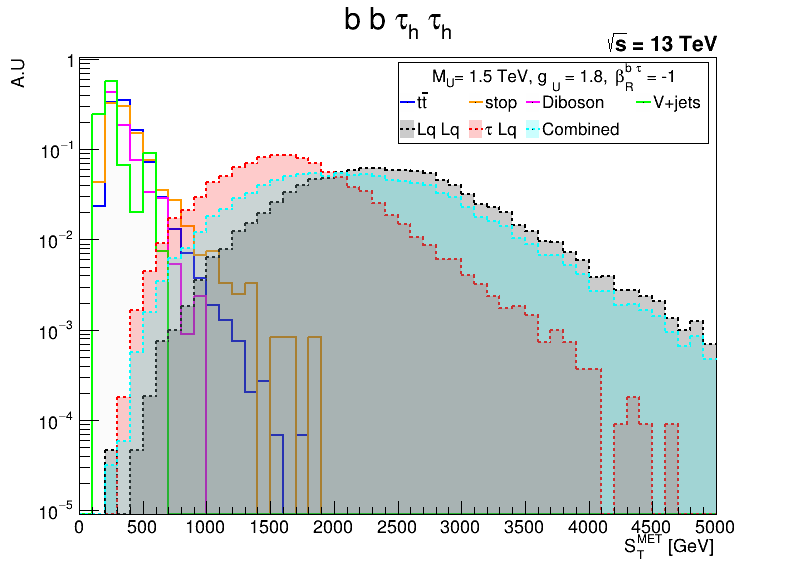

In [24]:
Histos, canvas, legend = Overlap_Histos(histogramas_signal = Histogramas_signal['Betard_minus1'], 
               histogramas_bkg = Histogramas_bkg, 
               process = 'b_b_tau_tau', 
               channel = 'hadronic', 
               cinematic_variable = 'sT(GeV)',                    
               signals =  {'Lq Lq': ['LQ_LQ'], '#tau Lq': ['Tau_LQ'], 'Combined':  ['LQ_LQ', 'Tau_LQ']} , 
               bkgs =  {'t#bar{t}': ['ttbar'], 'stop': ['stop'], 'Diboson': ['ww', 'wz', 'zz'], 'V+jets': ['w_jets', 'z_jets']}, 
               Titulo =  'b b #tau_{h} #tau_{h}',
               M = '1500', 
               ignorar = '', 
               alpha_bkg = 0.0, 
               alpha_signal = 0.2, 
               Stack = False, 
               Log_Y = True, 
               Log_X = False,
               Grid = False)
#canvas.Print('Grafica_Ejemplo.pdf')
#Histos.SetMaximum(10000)

In [25]:
Masses = ['0250','0500','0750','1000', '1250', '1500', '1750', '2000', '2250', '2500']

variable_cinematica_PDF = ['sT(GeV)', 'MET(GeV)', '#Delta R_{b_{1}#tau_{1}}', '#Delta #vec{pT}{b{1}#tau_{1}}(GeV)']

Variables_Cinematicas = {'b_tau_tau': {'hadronic': list(Histogramas_bkg['ww']['b_tau_tau']['hadronic'].keys()), 
                                      'semileptonic': list(Histogramas_bkg['ww']['b_tau_tau']['semileptonic'].keys())}, 
                         'b_b_tau_tau': {'hadronic': list(Histogramas_bkg['ww']['b_b_tau_tau']['hadronic'].keys()), 
                                      'semileptonic': list(Histogramas_bkg['ww']['b_b_tau_tau']['semileptonic'].keys())}}
!rm -rf Histos_Overlap
!mkdir Histos_Overlap
!mkdir Histos_Overlap/Betard_minus1
!mkdir Histos_Overlap/Betard_0

file = uproot.recreate('Histos_Overlap/Histos_Overlap.root')

  0%|          | 0/10 [00:00<?, ?it/s]

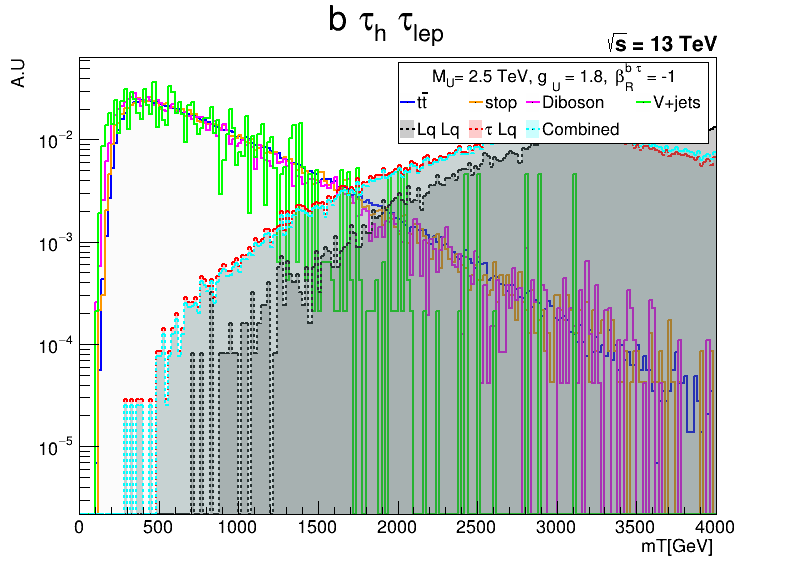

In [26]:
with Quiet():
    Masses_bar = tqdm(Masses)

    for Masa in Masses_bar:
        Masses_bar.set_description("Creando histogramas para M = %s" % Masa)
        for proceso in processes:
            for canal in channels:
                variables = Variables_Cinematicas[proceso][canal]
                
                for cinematica in variables:
                    
                    if (proceso == 'b_tau_tau' and canal == 'hadronic'): titulo = 'b #tau_{h} #tau_{h}'
                    if (proceso == 'b_b_tau_tau' and canal == 'hadronic'): titulo = 'b b #tau_{h} #tau_{h}'
                    if (proceso == 'b_tau_tau' and canal == 'semileptonic'): titulo = 'b #tau_{h} #tau_{lep}  '
                    if (proceso == 'b_b_tau_tau' and canal == 'semileptonic'): titulo = 'b b #tau_{h} #tau_{lep}  '   
                    
                    path = f'Betard_minus1/MLQ_{Masa}/{cinematica}_{canal}_{proceso}'

                    Histos, canvas, legend = Overlap_Histos(histogramas_signal = Histogramas_signal['Betard_minus1'], 
                                                               histogramas_bkg = Histogramas_bkg, 
                                                               process = proceso, 
                                                               channel = canal, 
                                                               cinematic_variable = cinematica,                    
                                                               signals =  {'Lq Lq': ['LQ_LQ'], '#tau Lq': ['Tau_LQ'], 'Combined':  ['LQ_LQ', 'Tau_LQ']} , 
                                                               bkgs =  {'t#bar{t}': ['ttbar'], 'stop': ['stop'], 'Diboson': ['ww', 'wz', 'zz'], 'V+jets': ['w_jets', 'z_jets']}, 
                                                               Titulo = titulo,
                                                               M = Masa, 
                                                               ignorar = '', 
                                                               alpha_bkg = 0, 
                                                               alpha_signal = 0.2, 
                                                               Stack = False, 
                                                               Log_Y = True, 
                                                               Log_X = False,
                                                               Grid = False) 
                    file[path] = Histos

                    !mkdir -p Histos_Overlap/Betard_minus1/MLQ_{Masa}

                    if cinematica in variable_cinematica_PDF: canvas.Print(f'Histos_Overlap/{path}_wRHC.pdf')


  0%|          | 0/7 [00:00<?, ?it/s]

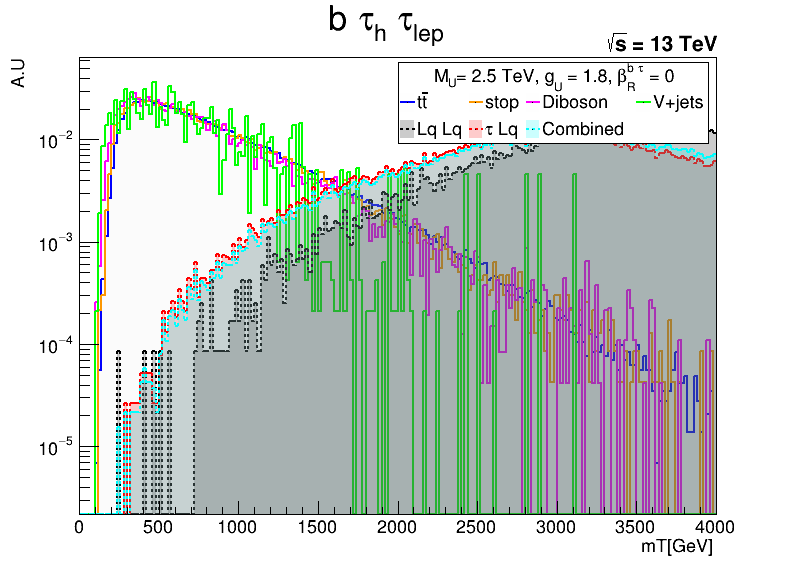

In [27]:
Masses = ['1000', '1250', '1500', '1750', '2000', '2250', '2500']

with Quiet():
    Masses_bar = tqdm(Masses)

    for Masa in Masses_bar:
        Masses_bar.set_description("Creando histogramas para M = %s" % Masa)
        for proceso in processes:
            for canal in channels:
                variables = Variables_Cinematicas[proceso][canal]
                
                for cinematica in variables:
                    
                    if (proceso == 'b_tau_tau' and canal == 'hadronic'): titulo = 'b #tau_{h} #tau_{h}'
                    if (proceso == 'b_b_tau_tau' and canal == 'hadronic'): titulo = 'b b #tau_{h} #tau_{h}'
                    if (proceso == 'b_tau_tau' and canal == 'semileptonic'): titulo = 'b #tau_{h} #tau_{lep}  '
                    if (proceso == 'b_b_tau_tau' and canal == 'semileptonic'): titulo = 'b b #tau_{h} #tau_{lep}  '   
                    
                    path = f'Betard_0/MLQ_{Masa}/{cinematica}_{canal}_{proceso}'

                    Histos, canvas, legend = Overlap_Histos(histogramas_signal = Histogramas_signal['Betard_0'], 
                                                               histogramas_bkg = Histogramas_bkg, 
                                                               process = proceso, 
                                                               channel = canal, 
                                                               cinematic_variable = cinematica,                    
                                                               signals =  {'Lq Lq': ['LQ_LQ'], '#tau Lq': ['Tau_LQ'], 'Combined':  ['LQ_LQ', 'Tau_LQ']} , 
                                                               bkgs =  {'t#bar{t}': ['ttbar'], 'stop': ['stop'], 'Diboson': ['ww', 'wz', 'zz'], 'V+jets': ['w_jets', 'z_jets']}, 
                                                               Titulo = titulo,
                                                               betard_label = '_wo_RHC',
                                                               M = Masa, 
                                                               ignorar = '', 
                                                               alpha_bkg = 0, 
                                                               alpha_signal = 0.2, 
                                                               Stack = False, 
                                                               Log_Y = True, 
                                                               Log_X = False,
                                                               Grid = False) 
                    file[path] = Histos

                    !mkdir -p Histos_Overlap/Betard_0/MLQ_{Masa}

                    if cinematica in variable_cinematica_PDF: canvas.Print(f'Histos_Overlap/{path}_woRHC.pdf')
file.close()